## Schönings Algorithmus für k-SAT
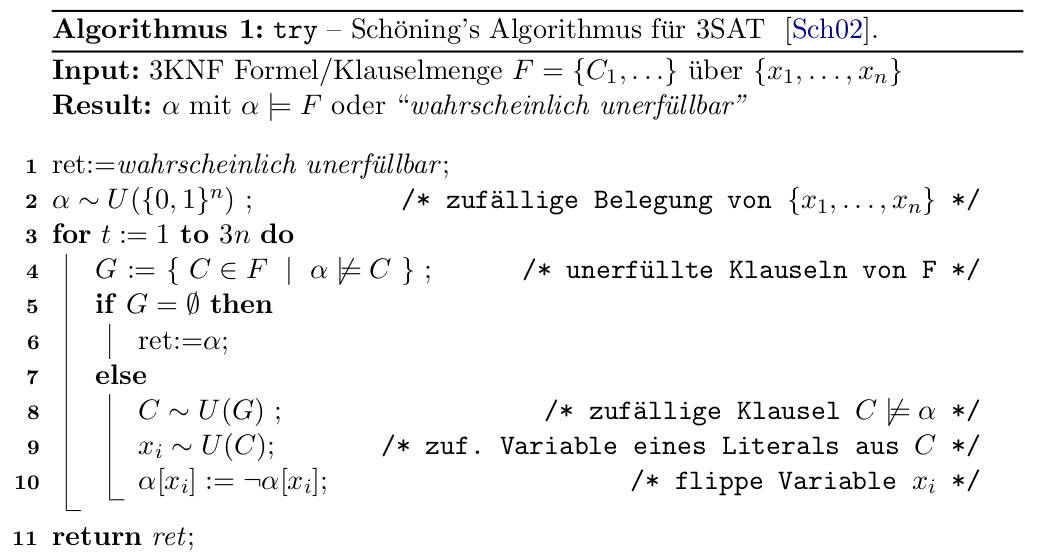

In [1]:
from pysat.formula import CNF
from pysat.solvers import Glucose3
import random
import time
import math
from functools import reduce
import pandas as pd

In [2]:
#utility functions for schoening
def get_random_model(n):
    return[pow(-1,random.getrandbits(1))*i for i in range(1,n+1)]

def get_g(cnf: CNF, model: list):
    g = CNF()
    for clause in cnf.clauses:
        d_clause = []
        for literal in clause:
            d_clause.append(bool(literal+model[abs(literal)-1]))
        if not reduce(lambda a,b: a or b, d_clause): g.append(clause)
    return g

### Algorithm

In [3]:
def schoening(cnf: CNF, ret='lazy'):
    n = cnf.nv
    res = []
    alpha = get_random_model(n)
    for t in range(3*n):
        G = get_g(cnf, alpha)
        if G.clauses == []:
            if ret == 'lazy': return alpha
            elif ret == 'bool': return True
            elif ret == 'eager': res.append(alpha)
        else:
            C = random.choice(G.clauses)
            x = abs(random.choice(C))
            alpha[x-1] *= -1
    if ret == 'lazy': return 'probably unsolvable'
    elif ret == 'bool': return False
    elif ret == 'eager': res
    else: raise ValueError('return argument must be one of: \'lazy\', \'bool\' or \'eager\'')

### Analysis

In [45]:
test_data = []

In [46]:
def create_random_3sat(num_clauses: int, max_var: int) -> CNF:
    f = []
    for clause in range(num_clauses):
        var = get_random_model(max_var)
        f.append([random.choice(var) for literal in range(3)])
    cnf = CNF()
    cnf.extend(f)
    return cnf

In [54]:
CLAUSES =  50
VARIABLES = 10

def tests():
    for i in range(5):
        f = create_random_3sat(CLAUSES,VARIABLES)
        s = Glucose3()
        s.append_formula(f)
        schoening_time = time.time()
        sch = schoening(f, 'bool')
        schoening_time = time.time()- schoening_time
        schoening_error_probability = ((1/ (2* math.sqrt(3*math.pi*f.nv)))*(3/4)**f.nv)
        glucose_time = time.time()
        glucose = s.solve()
        glucose_time = time.time()- glucose_time
        solutions = len([m for m in s.enum_models()])
        test_data.append((CLAUSES, VARIABLES,solutions,  sch, round(schoening_time,5), schoening_error_probability, glucose, round(glucose_time,5)))
tests()

In [55]:
df = pd.DataFrame(data = test_data, columns = ['|Clauses|', '|Variables|', '|Solutions|', 'Result Schoening', 'Execution Time Schoening','Error Probability Schoening', 'Result Glucose3 Solver', 'Execution Time Glucose3 Solver'])
df

,|Clauses|,|Variables|,|Solutions|,Result Schoening,Execution Time Schoening,Error Probability Schoening,Result Glucose3 Solver,Execution Time Glucose3 Solver
0,50,10,0,False,0.00094,0.0029,False,0.00001
1,50,10,1,False,0.00083,0.0029,True,0.00001
2,50,10,1,False,0.00097,0.0029,True,0.00001
3,50,10,3,False,0.00097,0.0029,True,0.00001
4,50,10,0,False,0.00098,0.0029,False,0.00001
5,50,10,0,False,0.00099,0.0029,False,0.00003
6,50,10,0,False,0.00098,0.0029,False,0.00001
7,50,10,1,True,0.00091,0.0029,True,0.00001
8,50,10,0,False,0.00094,0.0029,False,0.00001
9,50,10,0,False,0.00104,0.0029,False,0.00001
